In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\LAVANYA\Desktop\Lavanya -DS notes and task\Bank_Personal_Loan_Modelling.csv")

In [4]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
X = data.drop('Personal Loan', axis = 1).values
y = data['Personal Loan'].values.reshape((-1, 1))


In [6]:
X

array([[1.000e+00, 2.500e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 4.500e+01, 1.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 3.900e+01, 1.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [4.998e+03, 6.300e+01, 3.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.999e+03, 6.500e+01, 4.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+03, 2.800e+01, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00]])

In [7]:
y=y.reshape(-1,1)
y


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=1,test_size=0.30)


print("X Train : ", xtrain.shape)
print("X Test  : ", xtest.shape)
print("Y Train : ", ytrain.shape)
print("Y Test  : ", ytest.shape)


X Train :  (3500, 13)
X Test  :  (1500, 13)
Y Train :  (3500, 1)
Y Test  :  (1500, 1)


In [9]:

SVMclassifier = SVC(kernel = 'linear', random_state = 0)
SVMclassifier.fit(xtrain, ytrain)

C:\Users\LAVANYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [10]:
y_pred = SVMclassifier.predict(xtest)

In [11]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)


[[1320   31]
 [ 107   42]]


In [13]:
print("Classification report",metrics.classification_report(ytest,y_pred))

Classification report               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.58      0.28      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.66      1500
weighted avg       0.89      0.91      0.89      1500



In [14]:
SVM_acc1 = metrics.accuracy_score(ytest, y_pred)
print("Accuracy Score of SVC is:",SVM_acc1*100)

Accuracy Score of SVC is: 90.8


In [15]:
#knn
KNNclassifier = KNeighborsClassifier(n_neighbors = 3)
X = data.drop(columns="Personal Loan")           
y = data["Personal Loan"]   



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_train.head(1000))




(4000, 13)
(4000,)
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
868    869   40          15     161     94596       2    3.3          1   
936    937   62          32      19     92109       1    1.5          3   
4034  4035   35          11      82     94022       2    1.7          2   
1923  1924   45          19      22     90639       1    0.2          1   
3330  3331   34           9      32     95054       4    1.1          3   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4486  4487   44          19      48     92735       3    0.8          3   
2188  2189   29           4       9     92037       4    0.5          3   
2141  2142   28           4      38     92109       4    1.6          1   
2012  2013   57          31      51     93943       1    1.4          1   
3079  3080   55          31      23     95616       2    0.3          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard  
868        

In [17]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
print(scaled_X_train)
print(scaled_X_test)


[[-1.13903136 -0.46398276 -0.44381535 ... -0.25984742 -1.21585967
   1.5421992 ]
 [-1.09178696  1.45366155  1.0362221  ... -0.25984742 -1.21585967
  -0.64842466]
 [ 1.06061226 -0.89981101 -0.79205945 ... -0.25984742  0.82246333
   1.5421992 ]
 ...
 [ 0.004561   -0.37681711 -0.35675432 ... -0.25984742 -1.21585967
  -0.64842466]
 [ 0.76325046 -0.20248581 -0.18263227 ... -0.25984742  0.82246333
   1.5421992 ]
 [ 0.046942   -0.28965146 -0.35675432 ... -0.25984742  0.82246333
  -0.64842466]]
[[ 0.73545964  1.0178333   1.12328313 ... -0.25984742  0.82246333
   1.5421992 ]
 [ 1.21207225  0.75633635  0.77503902 ... -0.25984742 -1.21585967
  -0.64842466]
 [-0.40952226 -0.55114841 -0.96618151 ...  3.84841223  0.82246333
   1.5421992 ]
 ...
 [-0.7367592   0.58200505  0.687978   ... -0.25984742  0.82246333
  -0.64842466]
 [-1.22657246 -1.16130796 -1.22736459 ... -0.25984742  0.82246333
  -0.64842466]
 [ 1.1210573   0.6691707   0.60091697 ... -0.25984742 -1.21585967
   1.5421992 ]]


In [18]:
knn = KNeighborsClassifier(n_neighbors=3) # here n_neighbors is k 
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
#prediction
ypre = knn.predict(scaled_X_test)

C:\Users\LAVANYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
co=metrics.confusion_matrix(y_test,ypre)
co

array([[907,   2],
       [ 36,  55]], dtype=int64)

In [21]:
len(y_test)

1000

In [22]:
print("Classification report",metrics.classification_report(y_test,ypre))


Classification report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       909
           1       0.96      0.60      0.74        91

    accuracy                           0.96      1000
   macro avg       0.96      0.80      0.86      1000
weighted avg       0.96      0.96      0.96      1000



In [23]:
s=metrics.accuracy_score(y_test,ypre)
print("The accuracy score of KNN is:",s*100)

The accuracy score of KNN is: 96.2


In [24]:
#DT
X = data.drop(columns="Personal Loan")           
y = data["Personal Loan"]   


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.head(2000))

(4000, 13)
(4000,)
(1000, 13)
(1000,)
        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
1233  1234   53          29      22     93943       2   0.40          1   
1056  1057   36           6      25     95020       1   0.67          3   
1686  1687   62          38      39     96003       4   2.20          1   
187    188   46          21     159     94305       3   1.90          3   
3840  3841   56          31      35     95211       3   0.10          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
3687  3688   34          10      45     93943       1   1.33          1   
2491  2492   38          14      80     92868       2   2.70          1   
4885  4886   54          30      28     92103       2   0.80          1   
807    808   52          27     162     92096       1   8.10          1   
1469  1470   59          35      59     90005       4   1.20          2   

      Mortgage  Securities Account  CD Account  Online  Credi

In [26]:
'''scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)
print(scaled_x_train)
print(scaled_x_test)
'''

'scaler = StandardScaler()\nscaled_x_train = scaler.fit_transform(X_train)\nscaled_x_test = scaler.transform(X_test)\nprint(scaled_x_train)\nprint(scaled_x_test)\n'

In [27]:
#DT
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 10,max_depth = 3, min_samples_leaf = 5)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=10)

In [28]:
ypred = DTclassifier.predict(X_test)


In [29]:
cm2= metrics.confusion_matrix(y_test, ypred)
print(cm2)

[[893   7]
 [ 19  81]]


In [30]:
entropy = metrics.accuracy_score(y_test, ypred)
print("Accuracy score of entropy is: ",entropy*100)

Accuracy score of entropy is:  97.39999999999999


In [31]:
DTclassifier1 = DecisionTreeClassifier(criterion = 'gini', random_state = 10,
            max_depth = 5, min_samples_leaf = 8)
DTclassifier1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=10)

In [32]:
y_predt = DTclassifier1.predict(X_test)


In [33]:
gini= metrics.accuracy_score(y_test, y_predt)
print(f"Accuracy score of gini is: {gini*100}")

Accuracy score of gini is: 98.0


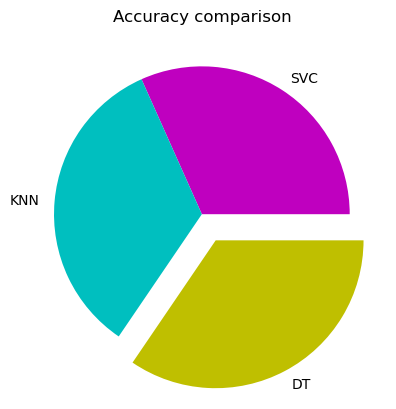

In [34]:
#The best algorithm for this dataset is DT with 98%
import matplotlib.pyplot as plt 

Accuracy = [90,96,98]
color_code = ['m','c','y']
deviate_fraction = [0,0,0.2]
Algorithm = ['SVC','KNN','DT']
plt.pie(Accuracy,colors=color_code,labels=Algorithm,explode=deviate_fraction)
plt.title('Accuracy comparison')
plt.show()